# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [3]:
!kaggle datasets download -d khaledzsa/bus-breakdown-and-delays
!unzip bus-breakdown-and-delays.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/bus-breakdown-and-delays
License(s): unknown
bus-breakdown-and-delays.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bus-breakdown-and-delays.zip
replace Bus_Breakdown_and_Delays.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [4]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')

In [5]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [6]:
df.tail()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age
147971,2016-2017,1353046,Project Read PM Run,2530,K617,Other,21436,05/25/2017 04:36:00 PM,05/25/2017 04:37:00 PM,Brooklyn,...,45min,7,Yes,Yes,Yes,05/25/2017 04:37:00 PM,NaN,05/25/2017 04:37:37 PM,Running Late,School-Age


In [7]:
df.shape

(147972, 21)

In [8]:
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [12]:
df.drop('Boro', axis=1, inplace=True)

In [10]:
df.drop('How_Long_Delayed', axis=1, inplace=True)

In [9]:
df.drop('Incident_Number', axis=1, inplace=True)

In [14]:
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Bus_Company_Name,0


In [18]:
df.dropna(subset=['Route_Number','Run_Type'], inplace=True)

In [ ]:
df.dropna(subset=['Reason'], inplace=True)

In [19]:
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,0
Bus_No,0
Route_Number,0
Reason,0
Schools_Serviced,0
Occurred_On,0
Created_On,0
Bus_Company_Name,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Bus_Company_Name                 147972 non-null  object
 10  Number_Of_Students_On_The_Bus    147972 non-null  int64 
 11  Has_Contractor_Notified_Schools  147972 non-null  object
 12  Has_Contractor_N

In [20]:
LabelEncoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = LabelEncoder.fit_transform(df[column])
df['Breakdown_or_Running_Late'] = LabelEncoder.fit_transform(df['Breakdown_or_Running_Late'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147693 entries, 0 to 147971
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   School_Year                      147693 non-null  int64
 1   Busbreakdown_ID                  147693 non-null  int64
 2   Run_Type                         147693 non-null  int64
 3   Bus_No                           147693 non-null  int64
 4   Route_Number                     147693 non-null  int64
 5   Reason                           147693 non-null  int64
 6   Schools_Serviced                 147693 non-null  int64
 7   Occurred_On                      147693 non-null  int64
 8   Created_On                       147693 non-null  int64
 9   Bus_Company_Name                 147693 non-null  int64
 10  Number_Of_Students_On_The_Bus    147693 non-null  int64
 11  Has_Contractor_Notified_Schools  147693 non-null  int64
 12  Has_Contractor_Notified_Parents  14

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [22]:
X = df.drop('Breakdown_or_Running_Late', axis=1)
y = df['Breakdown_or_Running_Late']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [60]:
model = Sequential() # With this number of neuros the  accuracy of the model was 0.8866 - loss: 0.3537
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 64)                  │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,321 (16.88 KB)

 Trainable params: 4,321 (16.88 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 # After changing the numbers of neurons the accuracy: 0.8835 and loss: 0.3739
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                     │ (None, 32)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,393 (5.44 KB)

 Trainable params: 1,393 (5.44 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# model = Sequential()
# model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
# model.add(Dense(16, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# After removing one hidden layer i think the performance of my model based on the accuracy: 0.8835 and loss: 0.3739
# model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 32)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [61]:
history= model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [63]:
history = model.fit(X_train, y_train, epochs=10, batch_size=30, validation_split=0.5)

Epoch 1/10
1970/1970 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8822 - loss: 0.3908 - val_accuracy: 0.8833 - val_loss: 0.3603
Epoch 2/10
1970/1970 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8834 - loss: 0.3601 - val_accuracy: 0.8833 - val_loss: 0.3602
Epoch 3/10
1970/1970 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8868 - loss: 0.3532 - val_accuracy: 0.8833 - val_loss: 0.3606
Epoch 4/10
1970/1970 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8850 - loss: 0.3570 - val_accuracy: 0.8833 - val_loss: 0.3603
Epoch 5/10
1970/1970 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8858 - loss: 0.3553 - val_accuracy: 0.8833 - val_loss: 0.3604
Epoch 6/10
1970/1970 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8858 - loss: 0.3554 - val_accuracy: 0.8833 - val_loss: 0.3602
Epoch 7/10
1970/1970 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8850 - loss: 0.3569 - val_accuracy: 0.8833 - val_loss: 0.3603
Epoch 8/10
1970/1970 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8837 - loss: 0.3596 -

In [64]:
history = model.fit(X_train, y_train, epochs=10, batch_size=30, validation_split=0.15)

Epoch 1/10
3348/3348 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8840 - loss: 0.3589 - val_accuracy: 0.8816 - val_loss: 0.3637
Epoch 2/10
3348/3348 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8849 - loss: 0.3572 - val_accuracy: 0.8816 - val_loss: 0.3639
Epoch 3/10
3348/3348 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8811 - loss: 0.3648 - val_accuracy: 0.8816 - val_loss: 0.3638
Epoch 4/10
3348/3348 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8837 - loss: 0.3596 - val_accuracy: 0.8816 - val_loss: 0.3643
Epoch 5/10
3348/3348 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8836 - loss: 0.3599 - val_accuracy: 0.8816 - val_loss: 0.3642
Epoch 6/10
3348/3348 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8828 - loss: 0.3614 - val_accuracy: 0.8816 - val_loss: 0.3637
Epoch 7/10
3348/3348 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8837 - loss: 0.3596 - val_accuracy: 0.8816 - val_loss: 0.3637
Epoch 8/10
3348/3348 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8862 - loss: 0.3544 

In [56]:
model.fit(X_train, y_train, epochs=5, batch_size=20, validation_split=0.5)

Epoch 1/5
2954/2954 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8833 - loss: 0.3603 - val_accuracy: 0.8833 - val_loss: 0.3602
Epoch 2/5
2954/2954 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8838 - loss: 0.3594 - val_accuracy: 0.8833 - val_loss: 0.3603
Epoch 3/5
2954/2954 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8833 - loss: 0.3603 - val_accuracy: 0.8833 - val_loss: 0.3602
Epoch 4/5
2954/2954 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8840 - loss: 0.3589 - val_accuracy: 0.8833 - val_loss: 0.3602
Epoch 5/5
2954/2954 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.8846 - loss: 0.3577 - val_accuracy: 0.8833 - val_loss: 0.3603


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [27]:
model.evaluate(X_test, y_test)

924/924 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8850 - loss: 0.3570


[0.35265079140663147, 0.8871661424636841]

In [39]:
model.evaluate(X_test, y_test)

924/924 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8850 - loss: 0.3570


[0.3524942994117737, 0.8871661424636841]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [ ]:
y_pred = model.prediction(X_test, y_test)

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

(0.5, 1.0)

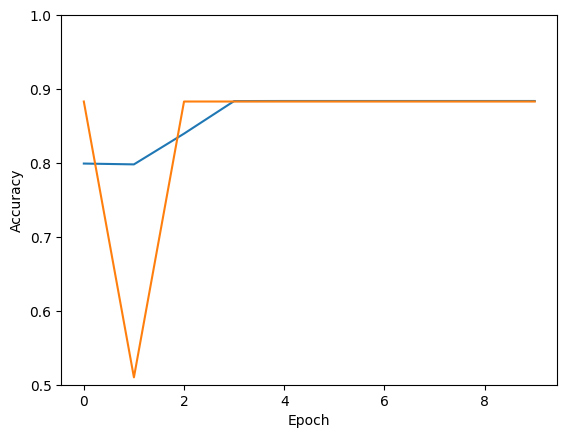

In [54]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])


## Save the Model
Save the trained model for submission.

In [35]:
model.save('MyModel.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:
1. label encoding because it easier to use, I think it enhance the acuuracy for my model rather than one hot encoder.
2. When I used two layers for my model the accuracy values was lower than loss values, after adding more epochs it gets a little better .
3. I choose the loss function binary_crossentropy because the output of my target should be Yes or No .
less numbers of neuros more accuracy for the model, also the batch size
5. I did not use any
8. I solve it by adding two hidden layer rather than one hidden layer
9. I notice even the changing of batch size will reflect my model accuracy and loss, the more batch size I add the less loss and more accuarcy of my model